<a href="https://colab.research.google.com/github/asatisakshi1/Prediction-using-Supervised-ML-linear-regression-/blob/Primary/Car_Price_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## 1. Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:

from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
import pandas as pd
car_data = pd.read_csv('data.csv' )

In [ ]:

car_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
car_data=car_data.drop(columns=["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"])

In [ ]:
car_data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
rename_cols = {"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", 
               "Driven_Wheels": "Drive Mode","highway MPG": "MPG_H", "city mpg": "MPG-C", "MSRP": "Price" }

In [ ]:
car_data=car_data.rename(rename_cols,axis=1)

In [ ]:
car_data.head()


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## Dropping the duplicate rows

In [ ]:
car_data.count()

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG_H           11914
MPG-C           11914
Price           11914
dtype: int64

In [ ]:
car_data=car_data.drop_duplicates()
car_data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
car_data.count()

Make            10925
Model           10925
Year            10925
HP              10856
Cylinders       10895
Transmission    10925
Drive Mode      10925
MPG_H           10925
MPG-C           10925
Price           10925
dtype: int64

##  Dropping the null or missing values 

In [ ]:
car_data.isnull().sum()

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG_H            0
MPG-C            0
Price            0
dtype: int64

In [ ]:
car_data=car_data.dropna()
car_data.head()

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG_H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
car_data.isnull().sum()

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG_H           0
MPG-C           0
Price           0
dtype: int64

In [ ]:
s=car_data.describe()
s

,Year,HP,Cylinders,MPG_H,MPG-C,Price
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


###  Removing outliers




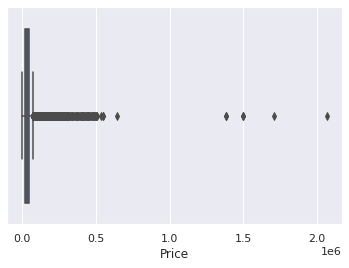

In [ ]:
sns.boxplot(x=car_data["Price"])

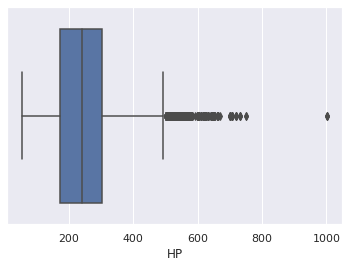

In [ ]:
sns.boxplot(x=car_data["HP"])

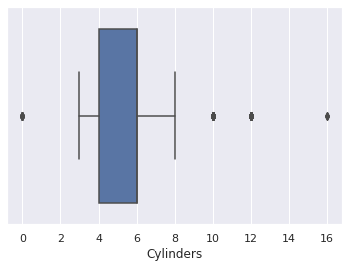

In [ ]:

sns.boxplot(x=car_data["Cylinders"])

In [ ]:
df=car_data.select_dtypes(include=['int','float'])
df

,Year,HP,Cylinders,MPG_H,MPG-C,Price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


In [ ]:
l=list(df.columns)
l

['Year', 'HP', 'Cylinders', 'MPG_H', 'MPG-C', 'Price']

In [ ]:
#using iqr technique for outlier removal
Q1 = car_data.quantile(0.25)
Q3 = car_data.quantile(0.75)
IQR = Q3 - Q1
df2 = car_data[~((car_data < (Q1 - 1.5 * IQR)) |(car_data > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df2)


          Make       Model  Year     HP  ...         Drive Mode MPG_H MPG-C  Price
0          BMW  1 Series M  2011  335.0  ...   rear wheel drive    26    19  46135
1          BMW    1 Series  2011  300.0  ...   rear wheel drive    28    19  40650
2          BMW    1 Series  2011  300.0  ...   rear wheel drive    28    20  36350
3          BMW    1 Series  2011  230.0  ...   rear wheel drive    28    18  29450
4          BMW    1 Series  2011  230.0  ...   rear wheel drive    28    18  34500
...        ...         ...   ...    ...  ...                ...   ...   ...    ...
11909    Acura         ZDX  2012  300.0  ...    all wheel drive    23    16  46120
11910    Acura         ZDX  2012  300.0  ...    all wheel drive    23    16  56670
11911    Acura         ZDX  2012  300.0  ...    all wheel drive    23    16  50620
11912    Acura         ZDX  2013  300.0  ...    all wheel drive    23    16  50920
11913  Lincoln      Zephyr  2006  221.0  ...  front wheel drive    26    17  28995

[91

In [ ]:
# using z score for outlier removal
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
abs_z_scores


array([[0.01474274, 0.73242469, 0.17438565, 0.04105891, 0.04931418,
        0.05846284],
       [0.01474274, 0.41376913, 0.17438565, 0.22545477, 0.04931418,
        0.02959072],
       [0.01474274, 0.41376913, 0.17438565, 0.22545477, 0.10121432,
        0.09862087],
       ...,
       [0.15700625, 0.41376913, 0.17438565, 0.44082944, 0.50089968,
        0.13046289],
       [0.29926976, 0.41376913, 0.17438565, 0.44082944, 0.50089968,
        0.13527894],
       [0.69657482, 0.30548199, 0.17438565, 0.04105891, 0.35037118,
        0.21669452]])

In [ ]:
filtered_entries = (abs_z_scores < 3).all(axis=1)
df3 = car_data[filtered_entries]
print(df3)


          Make       Model  Year     HP  ...         Drive Mode MPG_H MPG-C  Price
0          BMW  1 Series M  2011  335.0  ...   rear wheel drive    26    19  46135
1          BMW    1 Series  2011  300.0  ...   rear wheel drive    28    19  40650
2          BMW    1 Series  2011  300.0  ...   rear wheel drive    28    20  36350
3          BMW    1 Series  2011  230.0  ...   rear wheel drive    28    18  29450
4          BMW    1 Series  2011  230.0  ...   rear wheel drive    28    18  34500
...        ...         ...   ...    ...  ...                ...   ...   ...    ...
11909    Acura         ZDX  2012  300.0  ...    all wheel drive    23    16  46120
11910    Acura         ZDX  2012  300.0  ...    all wheel drive    23    16  56670
11911    Acura         ZDX  2012  300.0  ...    all wheel drive    23    16  50620
11912    Acura         ZDX  2013  300.0  ...    all wheel drive    23    16  50920
11913  Lincoln      Zephyr  2006  221.0  ...  front wheel drive    26    17  28995

[10

In [ ]:
print(df.shape)
print(df2.shape)
print(df3.shape)



(10827, 6)
(9191, 10)
(10338, 10)


we removed  489 rows from the dataframe which was detected as outlier by Z-score technique.
and removed 1636 rows from the dataframe which was detected as outlier by IQR technique.

In [ ]:
from collections import Counter
p=car_data['Make'].value_counts()
p


Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Bugatti             3
Genesis   

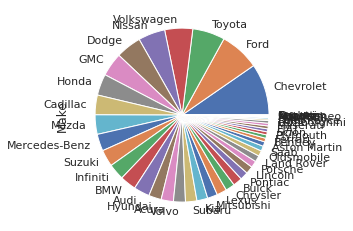

In [ ]:
p.plot(kind='pie')


## Visualising Univariate Distributions


### 1 . Histogram & Density Plots


Text(0.5, 1.0, 'HP')

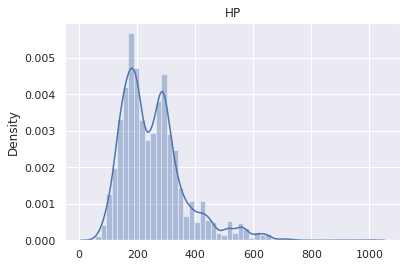

In [ ]:
# distplot for variable HP
sns.distplot(x=car_data['HP'])
plt.title("HP")

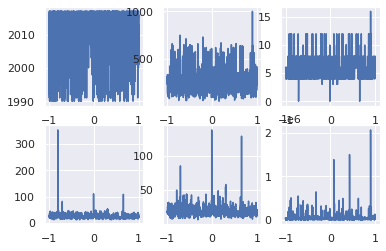

In [ ]:
fig,ax=plt.subplots(2,3)
x=np.linspace(-1,1,10827)
ax[0,0].plot(x,df['Year'],color='b')
ax[0,1].plot(x,df['HP'],color='b')
ax[1,0].plot(x,df['MPG_H'],color='b')
ax[1,1].plot(x,df['MPG-C'],color='b')
ax[0,2].plot(x,df['Cylinders'],color='b')
ax[1,2].plot(x,df['Price'],color='b')




## 2. Bar plots



<Figure size 864x432 with 0 Axes>

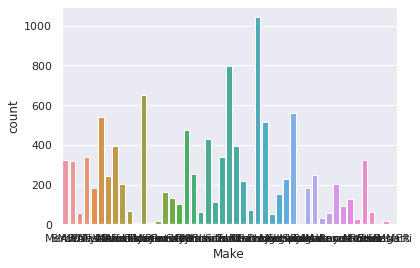

<Figure size 864x432 with 0 Axes>

In [ ]:
ax = sns.countplot(x="Make", data=car_data)

plt.figure (figsize=(12,6))

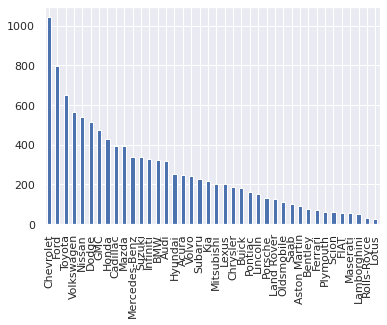

In [ ]:
car_data['Make'].value_counts(sort=True).nlargest(40).plot.bar()

### 3. Count Plot



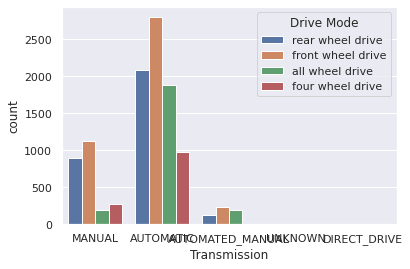

In [ ]:
ax = sns.countplot(x="Transmission", hue="Drive Mode", data=car_data)


# Visualising Bivariate Distributions




## 1. Scatterplots
. 



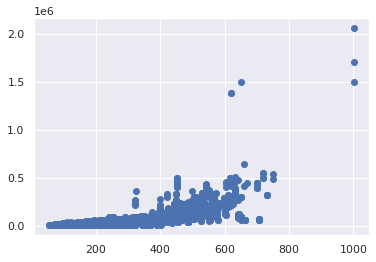

In [ ]:
plt.scatter(df["HP"], df["Price"])

## 2. Lineplot 



<Figure size 720x360 with 0 Axes>

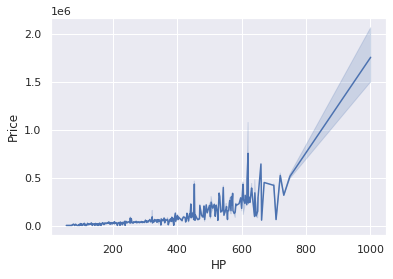

<Figure size 720x360 with 0 Axes>

In [ ]:
sns.lineplot(data=car_data, x="HP", y="Price")
plt.figure (figsize=(10,5))

## 3. Box plot w.r.t various variables


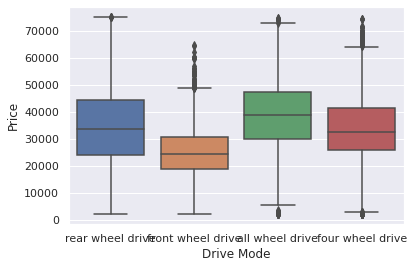

In [ ]:
#  boxplot of 'Price' across various 'Drive Mode'

sns.boxplot(x=df2["Drive Mode"], y=df2["Price"])


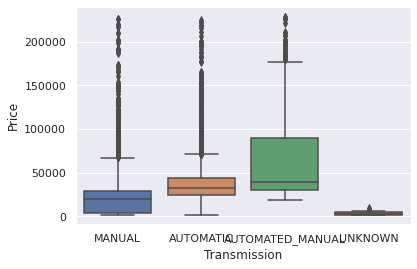

In [ ]:
#  boxplot of 'Price' across various 'Transmission'
sns.boxplot(x=df3["Transmission"], y=df3["Price"])

**distribution across two categorical variables** using the ```hue= ``` argument.

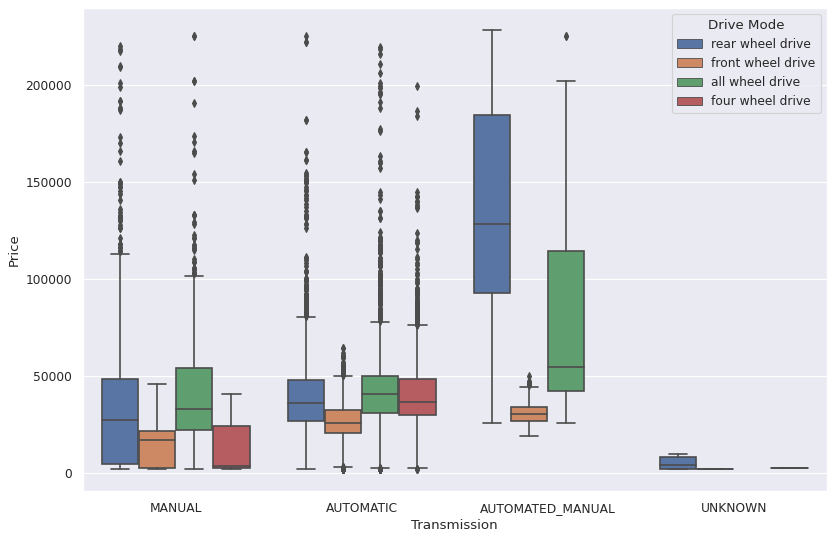

In [ ]:
#  boxplot with Transmission on x axis and Price on y axis. along with huw as Drive mode
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.boxplot(x=df3["Transmission"], y=df3["Price"],hue=car_data["Drive Mode"])

## 4. joint distributions



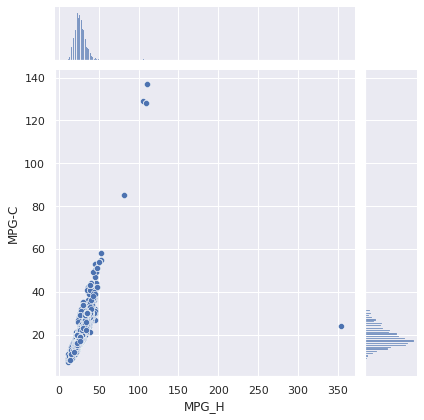

In [ ]:
# joint plots of MPG_H and MPG-C
sns.jointplot(data=df,x='MPG_H', y='MPG-C')

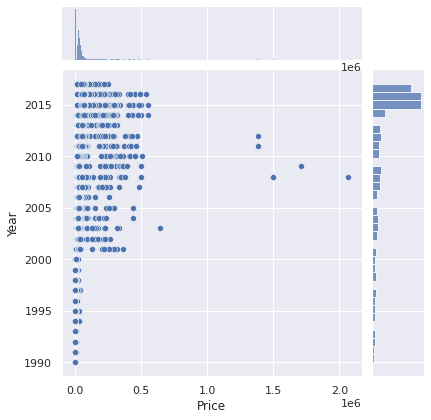

In [ ]:
# joint plots of Price and Year
sns.jointplot(data=df,x='Price', y='Year')


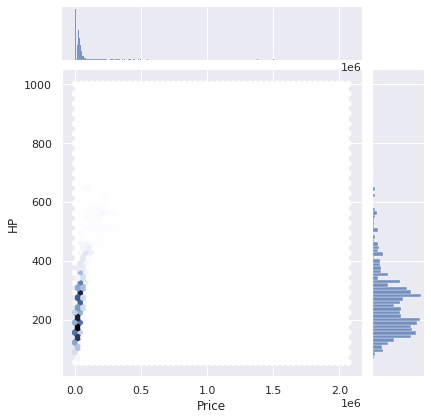

In [ ]:
#  hex plot for Prize and HP

sns.jointplot(data=df,x='Price', y='HP',kind='hex')

## 5. Plotting Aggregated Values across Categories



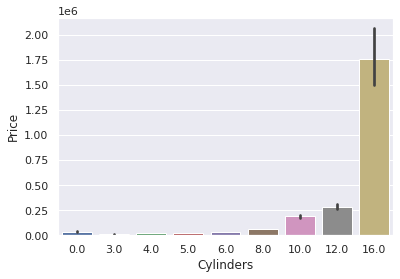

In [ ]:
# bar plot with default statistic=mean between Cylinder and Price
from numpy import mean
sns.barplot(data = df
            ,x = 'Cylinders'
            ,y = 'Price' 
            ,estimator = mean
            )

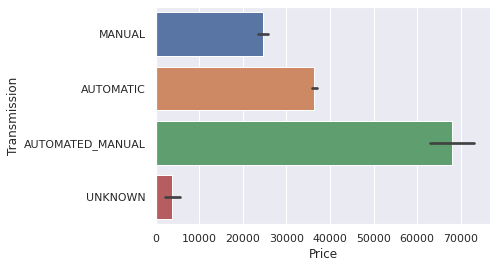

In [ ]:
#categorical variable Transmission across the y-axis
sns.barplot(data = df3,x = 'Price',y = 'Transmission' )

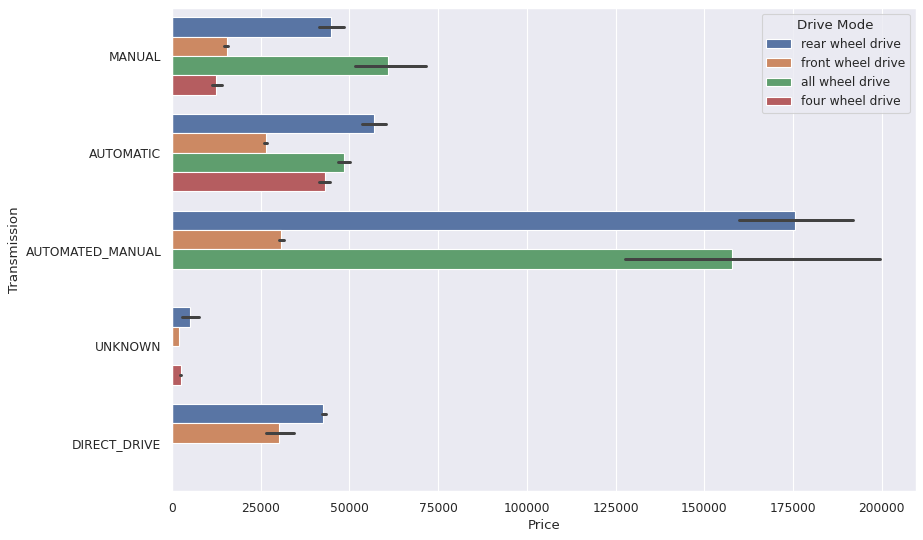

In [ ]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(data = car_data,x = 'Price',y = 'Transmission',hue='Drive Mode')

# Multivariate Plots



# 1. Pairplot




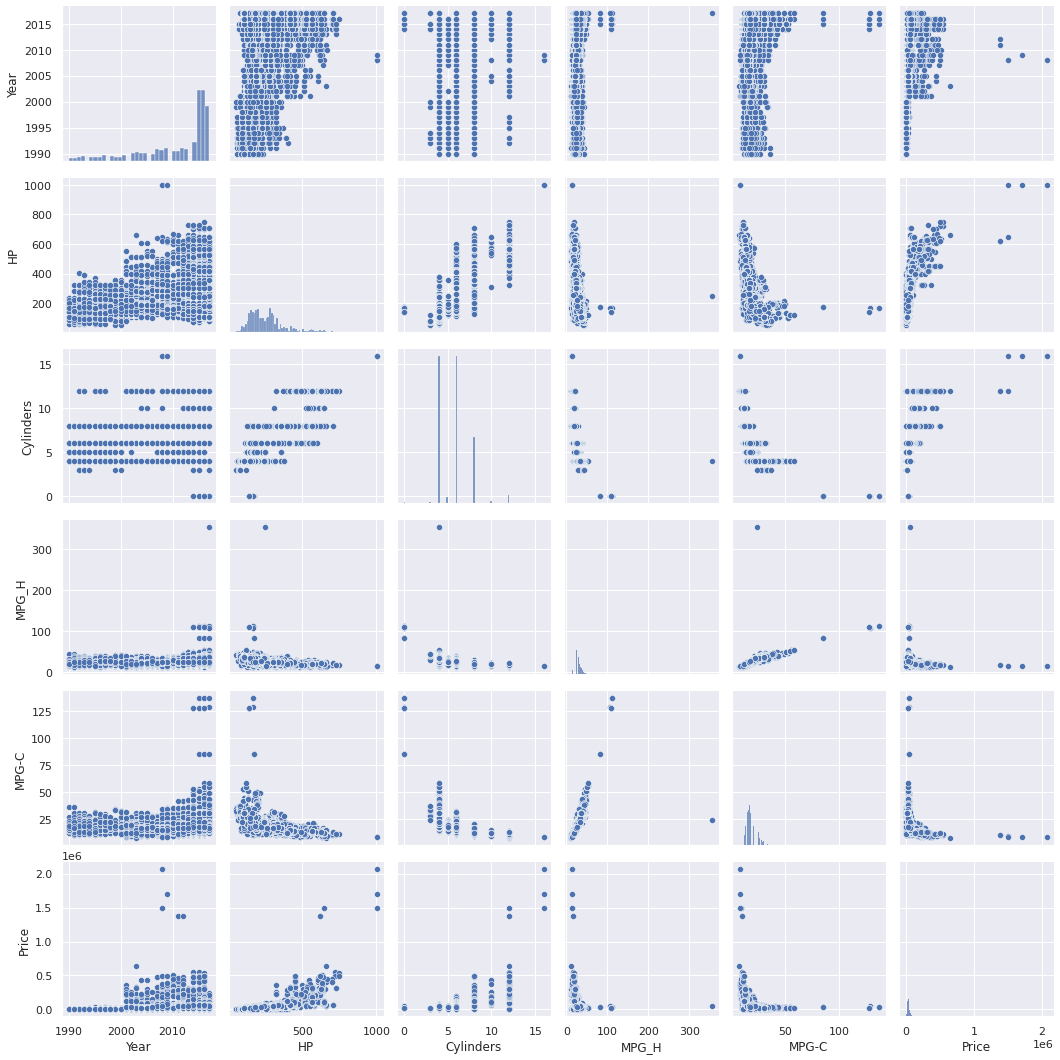

In [ ]:
sns.pairplot(df)

## 2. Multivariate scatter plots


<Figure size 1080x360 with 0 Axes>

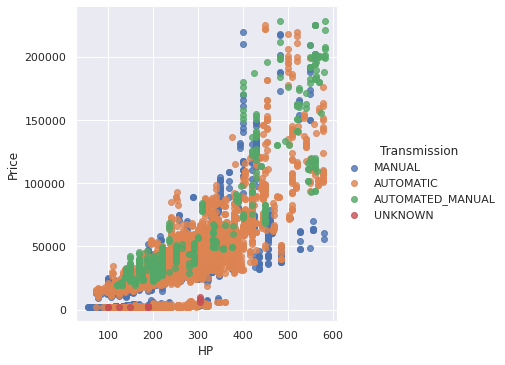

In [ ]:
plt.figure(figsize=(15,5))
sns.lmplot(data=df3,x='HP',y='Price',hue='Transmission',fit_reg=False)

## 3. Parallel Coordinates



In [ ]:
d=df.drop(['Price'],axis=1)

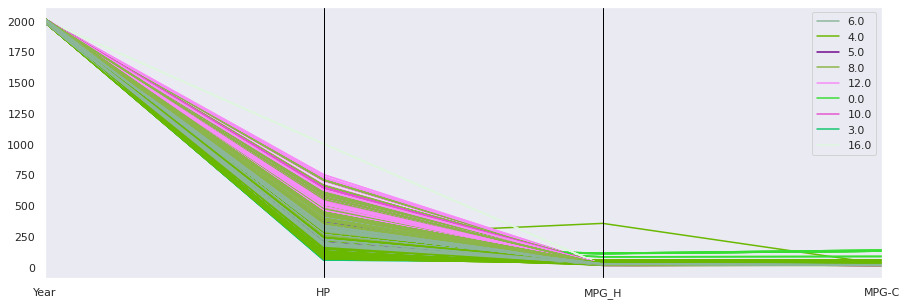

In [ ]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(15,5))
parallel_coordinates(d,"Cylinders")



## 4.  Heatmaps


In [ ]:
# correlation of features of the data df
corr = df.corr()
corr

,Year,HP,Cylinders,MPG_H,MPG-C,Price
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
MPG_H,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
MPG-C,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
Price,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


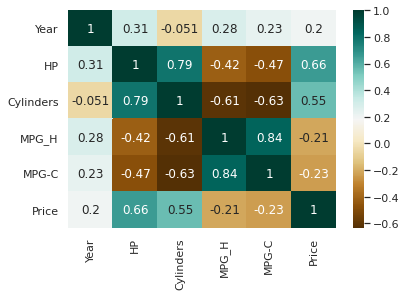

In [ ]:
# Using the correlated df,  heatmap 
sns.heatmap(corr, cmap='BrBG', annot=True)

-----------------------------------